Author: Tong Xu
<br>
Deadline: Wednesday December 9, 2020

# Load Data

Analyzing data from the 2016 Kaggle Competition "Two Sigma Connect: Rental Listing Inquiries" and predicting interest level on rental listings.

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_json('../Data/train.json')
test_df = pd.read_json('../Data/test.json')

train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


**Check for null values.**

In [3]:
train_df.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

In [4]:
test_df.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

There are no null values.

**Data Summary**

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [6]:
train_df['created'] = pd.to_datetime(train_df['created'])
train_df['interest_level'] = train_df['interest_level'].astype('category')
test_df['created'] = pd.to_datetime(test_df['created'])

X_train = train_df.drop(columns='interest_level')
y_train = train_df['interest_level'].apply(lambda interest: 0 if interest == 'low' else 1 if interest == 'medium' else 2)

Group features by data types.

In [7]:
numerical_features = list(X_train.select_dtypes('number').columns)
categorical_features = list(X_train.select_dtypes('object').columns)
date_features = list(X_train.select_dtypes('datetime').columns)

print('Numberical features:', numerical_features)
print('Categorical features:', categorical_features)
print('Datetime features:', date_features)

Numberical features: ['bathrooms', 'bedrooms', 'latitude', 'listing_id', 'longitude', 'price']
Categorical features: ['building_id', 'description', 'display_address', 'features', 'manager_id', 'photos', 'street_address']
Datetime features: ['created']


# Exploratory Data Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

**Target**

Text(0, 0.5, 'Count')

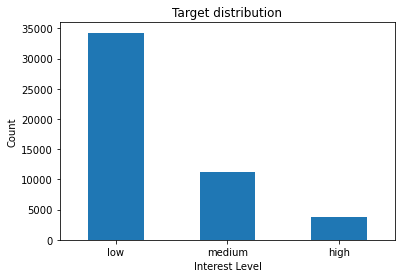

In [9]:
train_df.interest_level.value_counts().plot(kind='bar', title='Target distribution', rot='horizontal')
plt.xlabel('Interest Level')
plt.ylabel('Count')

**Price**

/Users/tongxu/opt/anaconda3/envs/ensf-ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rental Price Distribution')

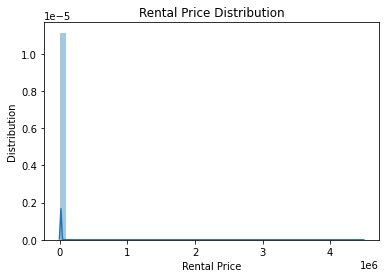

In [10]:
sns.distplot(X_train['price'])
plt.xlabel('Rental Price')
plt.ylabel('Distribution')
plt.title('Rental Price Distribution')

To better visualize the price distribution, I will set the lower and upper bound for price at 1 and 99 percentile.

In [11]:
lower_bound = np.percentile(train_df['price'], 1)
upper_bound = np.percentile(train_df['price'], 99)

print('1 percentile for rental price', lower_bound)
print('99 percentile for rental price', upper_bound)

1 percentile for rental price 1475.0
99 percentile for rental price 13000.0


/Users/tongxu/opt/anaconda3/envs/ensf-ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rental Price Distribution')

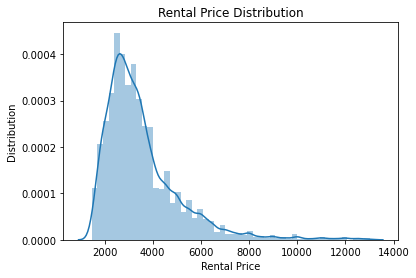

In [12]:
filtered_df = train_df[(train_df.price >= lower_bound) & (train_df.price <= upper_bound)]

sns.distplot(filtered_df['price'])
plt.xlabel('Rental Price')
plt.ylabel('Distribution')
plt.title('Rental Price Distribution')

We can also use a boxplot to show the median, quartiles and outliers

/Users/tongxu/opt/anaconda3/envs/ensf-ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

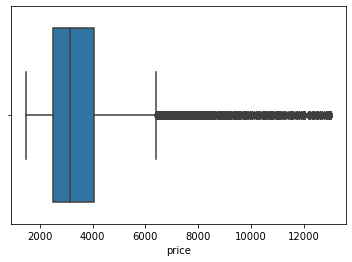

In [13]:
sns.boxplot(filtered_df['price'])

The price distribution is skewed to the right.

We can visualize price distribution as a function of interest level.

<AxesSubplot:xlabel='interest_level', ylabel='price'>

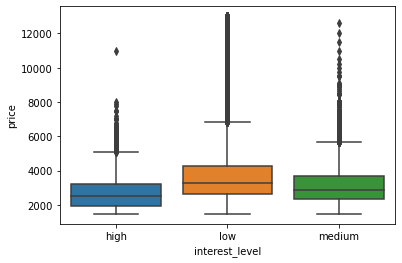

In [14]:
sns.boxplot(x='interest_level', y='price', data=filtered_df)

Expectedly, listing with high interest level have lowest median rental price.

**Bedroom and Bathroom**

(-1.0, 9.0)

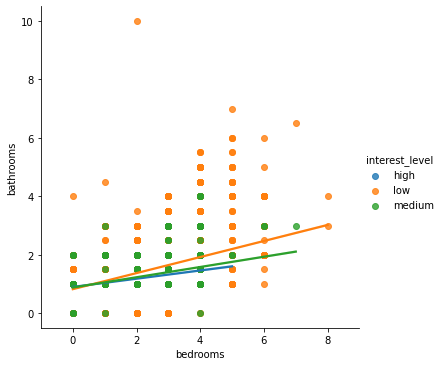

In [15]:
sns.lmplot(x='bedrooms', y='bathrooms', data=train_df, hue='interest_level')
plt.xlim(-1,9)

For a given number of bedrooms, rentals with fewer number of bathrooms have higher interest level

**Longitude and Latitude**

/Users/tongxu/opt/anaconda3/envs/ensf-ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='latitude', ylabel='Density'>

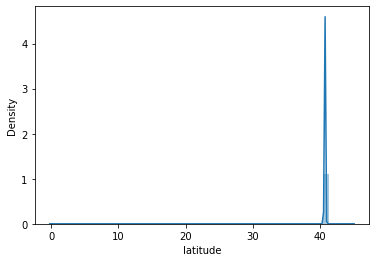

In [16]:
sns.distplot(train_df.latitude)

Again, to better visualize the longitude and latitude distribution, I will set the lower and upper bound at 1 and 99 percentile.

In [17]:
long_lower_bound = np.percentile(train_df['longitude'], 1)
long_upper_bound = np.percentile(train_df['longitude'], 99)
lat_lower_bound = np.percentile(train_df['latitude'], 1)
lat_upper_bound = np.percentile(train_df['latitude'], 99)

print('1 percentile for rental longitude', long_lower_bound)
print('99 percentile for rental longitude', long_upper_bound)
print('1 percentile for rental latitude', lat_lower_bound)
print('99 percentile for rental latitude', lat_upper_bound)

1 percentile for rental longitude -74.0162
99 percentile for rental longitude -73.852651
1 percentile for rental latitude 40.6404
99 percentile for rental latitude 40.862047


In [18]:
filtered_df = train_df[(train_df.longitude >= long_lower_bound) & (train_df.longitude <= long_upper_bound)
                      &(train_df.latitude >= lat_lower_bound) & (train_df.latitude <= lat_upper_bound)]

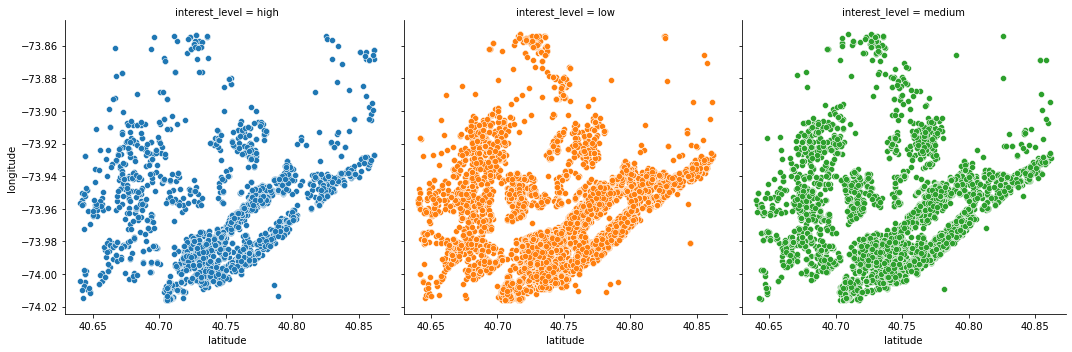

In [19]:
g = sns.FacetGrid(filtered_df, hue='interest_level', col='interest_level', height=5)
g.map(sns.scatterplot, 'latitude', 'longitude')

There does not appear to be correlation between location and interest level.

**Date-time Feature**

In [20]:
copy_df = train_df.copy()
copy_df['created_month'] = copy_df.created.dt.month
copy_df['created_date'] = copy_df.created.dt.date
copy_df['created_hour'] = copy_df.created.dt.hour
copy_df['created_weekday'] = copy_df.created.dt.weekday

*Number of listings created based on dates:*

In [21]:
copy_df.groupby('created_month')['listing_id'].agg(np.ma.count)

created_month
4    16411
5    15797
6    17144
Name: listing_id, dtype: int64

<AxesSubplot:xlabel='created_date', ylabel='listing_id'>

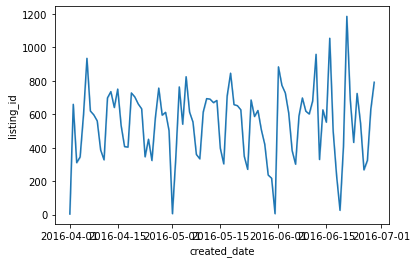

In [22]:
sns.lineplot(x='created_date', y='listing_id', data=copy_df, estimator=np.ma.count)

<AxesSubplot:xlabel='created_date', ylabel='listing_id'>

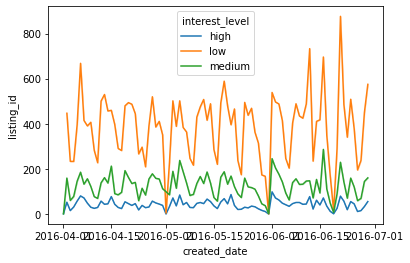

In [23]:
sns.lineplot(x='created_date', y='listing_id', data=copy_df, estimator=np.ma.count, hue='interest_level')

No change in number of listing over time.

*Median prices of listing based on dates:*

In [24]:
copy_df.groupby('created_month')['price'].agg(np.median)

created_month
4    3100
5    3195
6    3150
Name: price, dtype: int64

<AxesSubplot:xlabel='created_date', ylabel='price'>

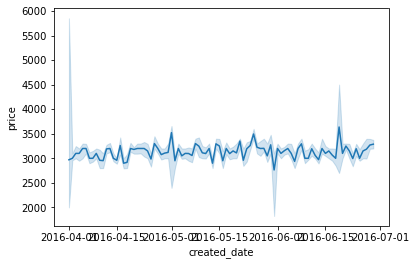

In [25]:
sns.lineplot(x='created_date', y='price', data=copy_df, estimator=np.median)

<AxesSubplot:xlabel='created_date', ylabel='price'>

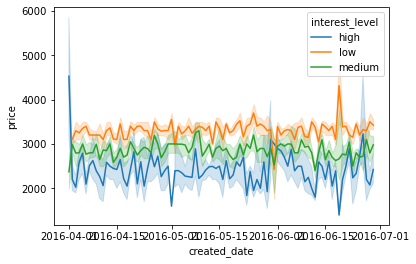

In [26]:
sns.lineplot(x='created_date', y='price', data=copy_df, estimator=np.median, hue='interest_level')

No changes in listing price over time.

*Number of listings based on the weekdays:*

<AxesSubplot:xlabel='created_weekday', ylabel='listing_id'>

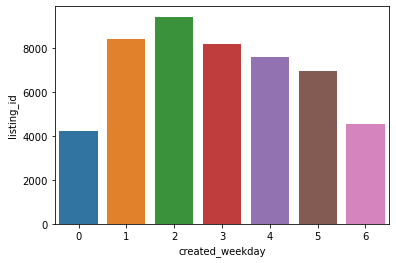

In [27]:
sns.barplot(x='created_weekday', y='listing_id', data=copy_df, estimator=np.ma.count)

More listing are posted on Tuesday and fewer listings are posted over the weekend.

*Number of listings based on hours in a day:*

<AxesSubplot:xlabel='created_hour', ylabel='listing_id'>

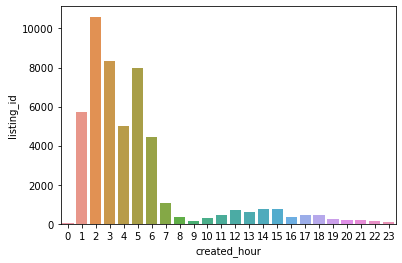

In [28]:
sns.barplot(x='created_hour', y='listing_id', data=copy_df, estimator=np.ma.count)

More listing are posted in the morning.